In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

### Excercise 9: Train a LinearSVC, an SVC and an SGD classifier on a lineary separable dataset

In [11]:
from sklearn.datasets import make_blobs

X, y = make_blobs(n_samples=1000, centers=2, random_state=42)

Text(0, 0.5, '$X1$')

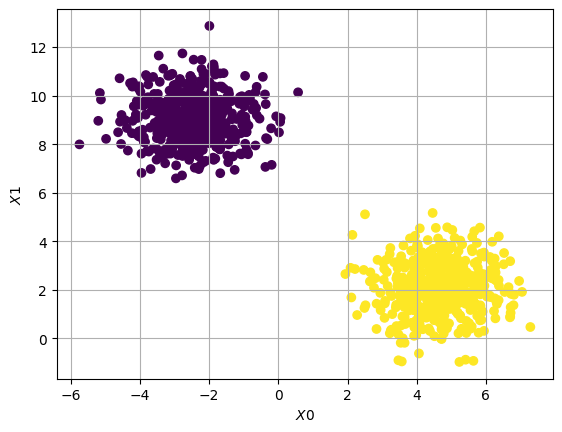

In [12]:
plt.scatter(X[:, 0], X[:, 1], c=y)
plt.grid()
plt.xlabel("$X0$")
plt.ylabel("$X1$")

In [14]:
X_train, X_test  = X[:900], X[900:]
y_train, y_test = y[:900], y[900:]

In [98]:
# We use scaler as a standalone step because using a pipeline would require a lot of changes
# in the plot_decision_boundary() function
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)

In [78]:
# train a LinearSVC model first

from sklearn.svm import LinearSVC

lin_svc = LinearSVC(C=0.01, loss="hinge", random_state=42, dual=True)
lin_svc.fit(X_train_scaled, y_train)

LinearSVC(C=0.01, dual=True, loss='hinge', random_state=42)

In [79]:
lin_svc.intercept_, lin_svc.coef_

(array([0.00278223]), array([[ 0.69886654, -0.65353426]]))

In [99]:
lin_svc.score(X_test_scaled, y_test)

1.0

In [47]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax, colorstring="k"):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    # => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0] / w[1] * x0 - b / w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    plt.plot(x0, decision_boundary, f"{colorstring}-", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_up, f"{colorstring}--", linewidth=2, zorder=-2)
    plt.plot(x0, gutter_down, f"{colorstring}--", linewidth=2, zorder=-2)
    if hasattr(svm_clf, "support_vectors_"):
        svs = svm_clf.support_vectors_
        plt.scatter(svs[:, 0], svs[:, 1], s=180, facecolors='#AAA',
                    zorder=-1)

In [81]:
# Now let's train an SVC model
from sklearn.svm import SVC

svc = SVC(kernel="linear", C=0.01, random_state=42)
svc.fit(X_train_scaled, y_train)

SVC(C=0.01, kernel='linear', random_state=42)

In [82]:
svc.intercept_, svc.coef_

(array([0.00264956]), array([[ 0.69908569, -0.65326592]]))

In [100]:
svc.score(X_test_scaled, y_test)

1.0

Text(0, 0.5, '$X1$')

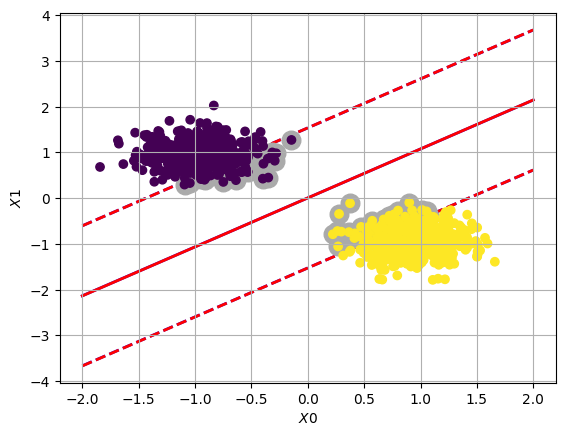

In [87]:
plot_svc_decision_boundary(lin_svc, -2, 2, "b")
plot_svc_decision_boundary(svc, -2, 2, "r")
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train)
plt.grid()
plt.xlabel("$X0$")
plt.ylabel("$X1$")

In [108]:
# Finally, an SGD classifier
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(alpha=0.01, loss="hinge", random_state=42)
sgd_clf.fit(X_train_scaled, y_train)

SGDClassifier(alpha=0.01, random_state=42)

In [106]:
sgd_clf.intercept_, sgd_clf.coef_

(array([0.19979309]), array([[ 1.46520659, -1.36777043]]))

In [101]:
sgd_clf.score(X_test_scaled, y_test)

1.0

Text(0, 0.5, '$X1$')

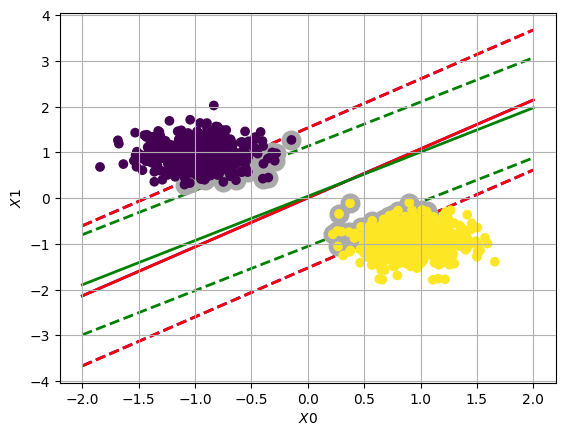

In [109]:
plot_svc_decision_boundary(lin_svc, -2, 2, "b")
plot_svc_decision_boundary(svc, -2, 2, "r")
plot_svc_decision_boundary(sgd_clf, -2, 2, "g")
plt.scatter(X_train_scaled[:, 0], X_train_scaled[:, 1], c=y_train)
plt.grid()
plt.xlabel("$X0$")
plt.ylabel("$X1$")

They look close enough. We had to set `loss="hinge"` for all models and then trial and error with the regularization parameters `C` and `alpha`. For this particular dataset, `C = alpha = 0.01` seems to give similar models. For the iris dataset used in the book's solution, these were set to `C=5 and alpha = 0.05` respectively

### Excercise 10: Train an SVM classifier on the wine dataset

In [110]:
from sklearn.datasets import load_wine

wine = load_wine(as_frame=True)
wine.data



,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95.0,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740.0
174,13.40,3.91,2.48,23.0,102.0,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750.0
175,13.27,4.28,2.26,20.0,120.0,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835.0
176,13.17,2.59,2.37,20.0,120.0,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840.0


In [111]:
wine.target_names

array(['class_0', 'class_1', 'class_2'], dtype='<U7')

In [112]:
wine.target

0      0
1      0
2      0
3      0
4      0
      ..
173    2
174    2
175    2
176    2
177    2
Name: target, Length: 178, dtype: int64

In [113]:
from sklearn.model_selection import train_test_split

X, y = wine.data, wine.target
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [126]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# ALWAYS remember to scale when using SVM!!!
svm_pipeline = Pipeline([
    ("scaler", StandardScaler()),
    ("svm_clf", SVC(random_state=42))
])

param_grid = [{
    'svm_clf__kernel': ['linear'],
    'svm_clf__C': [0.1, 1, 10, 100],
},
{'svm_clf__kernel': ['poly'],
 'svm_clf__C': [0.1, 1, 10, 100],
 'svm_clf__degree': [2, 3, 5, 10]
},
{'svm_clf__kernel': ['rbf'],
  'svm_clf__C': [0.1, 1, 10, 100],
  'svm_clf__gamma': ['scale', 'auto']
}]

grid_search = GridSearchCV(svm_pipeline, param_grid, n_jobs=8, cv=3,
                           scoring="accuracy")
grid_search.fit(X_train, y_train)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svm_clf', SVC(random_state=42))]),
             n_jobs=8,
             param_grid=[{'svm_clf__C': [0.1, 1, 10, 100],
                          'svm_clf__kernel': ['linear']},
                         {'svm_clf__C': [0.1, 1, 10, 100],
                          'svm_clf__degree': [2, 3, 5, 10],
                          'svm_clf__kernel': ['poly']},
                         {'svm_clf__C': [0.1, 1, 10, 100],
                          'svm_clf__gamma': ['scale', 'auto'],
                          'svm_clf__kernel': ['rbf']}],
             scoring='accuracy')

In [127]:
grid_search.best_score_

0.9924242424242425

In [128]:
grid_search.best_params_

{'svm_clf__C': 1, 'svm_clf__kernel': 'linear'}

In [129]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_svm_clf__C,param_svm_clf__kernel,param_svm_clf__degree,param_svm_clf__gamma,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002829,0.001031,0.001144,0.000477,0.1,linear,NaN,NaN,"{'svm_clf__C': 0.1, 'svm_clf__kernel': 'linear'}",1.000000,0.977273,0.977273,0.984848,0.010714,10
1,0.002228,0.000014,0.000781,0.000007,1,linear,NaN,NaN,"{'svm_clf__C': 1, 'svm_clf__kernel': 'linear'}",1.000000,1.000000,0.977273,0.992424,0.010714,1
2,0.002019,0.000191,0.000742,0.000029,10,linear,NaN,NaN,"{'svm_clf__C': 10, 'svm_clf__kernel': 'linear'}",1.000000,1.000000,0.977273,0.992424,0.010714,1
3,0.001469,0.000017,0.000849,0.000269,100,linear,NaN,NaN,"{'svm_clf__C': 100, 'svm_clf__kernel': 'linear'}",1.000000,1.000000,0.977273,0.992424,0.010714,1
4,0.001716,0.000227,0.000718,0.000035,0.1,poly,2,NaN,"{'svm_clf__C': 0.1, 'svm_clf__degree': 2, 'svm...",0.688889,0.545455,0.704545,0.646296,0.071592,25
5,0.001564,0.000030,0.000696,0.000009,0.1,poly,3,NaN,"{'svm_clf__C': 0.1, 'svm_clf__degree': 3, 'svm...",0.755556,0.590909,0.704545,0.683670,0.068818,23
6,0.002094,0.000774,0.001222,0.000749,0.1,poly,5,NaN,"{'svm_clf__C': 0.1, 'svm_clf__degree': 5, 'svm...",0.533333,0.522727,0.522727,0.526263,0.005000,27
7,0.001688,0.000183,0.000711,0.000032,0.1,poly,10,NaN,"{'svm_clf__C': 0.1, 'svm_clf__degree': 10, 'sv...",0.533333,0.409091,0.477273,0.473232,0.050802,28
8,0.001646,0.000171,0.000705,0.000024,1,poly,2,NaN,"{'svm_clf__C': 1, 'svm_clf__degree': 2, 'svm_c...",0.933333,0.886364,0.909091,0.909596,0.019179,16
9,0.001820,0.000274,0.000707,0.000027,1,poly,3,NaN,"{'svm_clf__C': 1, 'svm_clf__degree': 3, 'svm_c...",1.000000,0.886364,0.954545,0.946970,0.046700,13


### Excercise 11: Train an SVM regressor on the California housing dataset

In [130]:
from sklearn.datasets import fetch_california_housing

housing = fetch_california_housing(as_frame=True)

In [132]:
X = housing.data
y = housing.target

In [133]:
X.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [134]:
y.head()

0    4.526
1    3.585
2    3.521
3    3.413
4    3.422
Name: MedHouseVal, dtype: float64

In [135]:
X.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000


In [136]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
dtypes: float64(8)
memory usage: 1.3 MB


In [137]:
# Generate the income_cat feature in order to use it for Stratified sampling
X["income_cat"] = pd.cut(X["MedInc"],
                               bins=[0., 1.5, 3.0, 4.5, 6., np.inf],
                               labels=[1, 2, 3, 4, 5])

In [142]:
# Split the data into a training set and a test set using stratified sampling

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=X["income_cat"], random_state=42)

In [143]:
# Verify the proportions of the different values of the income_cat feature
# have been preserved in the splits
print(X_train["income_cat"].value_counts() / len(X_train))
print(X_test["income_cat"].value_counts() / len(X_test))
print(X["income_cat"].value_counts() / len(X))

income_cat
3    0.350594
2    0.318859
4    0.176296
5    0.114462
1    0.039789
Name: count, dtype: float64
income_cat
3    0.350533
2    0.318798
4    0.176357
5    0.114341
1    0.039971
Name: count, dtype: float64
income_cat
3    0.350581
2    0.318847
4    0.176308
5    0.114438
1    0.039826
Name: count, dtype: float64


In [144]:
# Drop the income_cat column as it is not needed anymore
for set_ in (X_train, X_test):
    set_.drop("income_cat", axis=1, inplace=True)

In [148]:
from sklearn.svm import LinearSVR

lin_svr_p = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", LinearSVR(random_state=42, dual=True))
])
param_grid = [
    {
        'svr__C': [0.1, 1., 10.],
        'svr__epsilon': [0., 0.1, 1.]
    }
]
grid_search = GridSearchCV(lin_svr_p, param_grid, cv=3, verbose=2,
                           n_jobs=8, scoring="neg_root_mean_squared_error")
grid_search.fit(X_train[:5000], y_train[:5000])

Fitting 3 folds for each of 9 candidates, totalling 27 fits
[CV] END .......................svr__C=0.1, svr__epsilon=0.0; total time=   0.0s
[CV] END .......................svr__C=0.1, svr__epsilon=0.0; total time=   0.0s
[CV] END .......................svr__C=0.1, svr__epsilon=0.1; total time=   0.0s
[CV] END .......................svr__C=0.1, svr__epsilon=0.1; total time=   0.0s
[CV] END .......................svr__C=0.1, svr__epsilon=0.0; total time=   0.0s
[CV] END .......................svr__C=0.1, svr__epsilon=1.0; total time=   0.0s
[CV] END .......................svr__C=0.1, svr__epsilon=0.1; total time=   0.0s
[CV] END .......................svr__C=0.1, svr__epsilon=1.0; total time=   0.0s
[CV] END .......................svr__C=0.1, svr__epsilon=1.0; total time=   0.0s
[CV] END .......................svr__C=1.0, svr__epsilon=0.0; total time=   0.0s
[CV] END .......................svr__C=1.0, svr__epsilon=1.0; total time=   0.0s
[CV] END .......................svr__C=1.0, svr__

/Users/nikolaoschachampis/Library/Caches/pypoetry/virtualenvs/handson-ml3-DRIwlIAE-py3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/nikolaoschachampis/Library/Caches/pypoetry/virtualenvs/handson-ml3-DRIwlIAE-py3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/nikolaoschachampis/Library/Caches/pypoetry/virtualenvs/handson-ml3-DRIwlIAE-py3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/nikolaoschachampis/Library/Caches/pypoetry/virtualenvs/handson-ml3-DRIwlIAE-py3.10/lib/python3.10/site-packages/sklearn/svm/_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
/Users/n

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr',
                                        LinearSVR(dual=True, max_iter=10000,
                                                  random_state=42))]),
             n_jobs=8,
             param_grid=[{'svr__C': [0.1, 1.0, 10.0],
                          'svr__epsilon': [0.0, 0.1, 1.0]}],
             scoring='neg_root_mean_squared_error', verbose=2)

Oops.. the liblinear algorithm failed to converge. Let's try SVR class with different kernels

In [150]:
from sklearn.svm import SVR

svr_p = Pipeline([
    ("scaler", StandardScaler()),
    ("svr", SVR())
])

param_grid = [
    {
        'svr__kernel': ['linear'],
        'svr__C':[0.1, 1., 10., 100.]
    },
    {
        'svr__kernel': ['rbf'],
        'svr__C': [0.1, 1., 10.],
        'svr__gamma': ['scale', 'auto', 0.1, 1.]
    },
    {
        'svr__kernel': ['poly'],
        'svr__degree': [2, 3, 5, 10]
    }
]
grid_search = GridSearchCV(svr_p, param_grid, cv=3, verbose=2,
                           n_jobs=8, scoring="neg_root_mean_squared_error")
grid_search.fit(X_train[:5000], y_train[:5000])

Fitting 3 folds for each of 20 candidates, totalling 60 fits
[CV] END .....................svr__C=0.1, svr__kernel=linear; total time=   0.2s
[CV] END .....................svr__C=0.1, svr__kernel=linear; total time=   0.2s
[CV] END .....................svr__C=0.1, svr__kernel=linear; total time=   0.2s
[CV] END .....................svr__C=1.0, svr__kernel=linear; total time=   0.4s
[CV] END .....................svr__C=1.0, svr__kernel=linear; total time=   0.4s
[CV] END .....................svr__C=1.0, svr__kernel=linear; total time=   0.4s
[CV] END ......svr__C=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.3s
[CV] END ......svr__C=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.3s
[CV] END ......svr__C=0.1, svr__gamma=scale, svr__kernel=rbf; total time=   0.3s
[CV] END .......svr__C=0.1, svr__gamma=auto, svr__kernel=rbf; total time=   0.3s
[CV] END .......svr__C=0.1, svr__gamma=auto, svr__kernel=rbf; total time=   0.3s
[CV] END .......svr__C=0.1, svr__gamma=auto, svr

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=8,
             param_grid=[{'svr__C': [0.1, 1.0, 10.0, 100.0],
                          'svr__kernel': ['linear']},
                         {'svr__C': [0.1, 1.0, 10.0],
                          'svr__gamma': ['scale', 'auto', 0.1, 1.0],
                          'svr__kernel': ['rbf']},
                         {'svr__degree': [2, 3, 5, 10],
                          'svr__kernel': ['poly']}],
             scoring='neg_root_mean_squared_error', verbose=2)

In [151]:
grid_search.best_params_

{'svr__C': 10.0, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'}

In [152]:
grid_search.best_score_

-0.548413100487798

In [154]:
param_grid = [
    {
        'svr__kernel': ['rbf'],
        'svr__C': [10., 50., 100.,],
        'svr__gamma': ['scale', 'auto', 0.1, 1.]
    }
]
grid_search = GridSearchCV(svr_p, param_grid, cv=5, verbose=3,
                           n_jobs=8, scoring="neg_root_mean_squared_error")
grid_search.fit(X_train[:5000], y_train[:5000])

Fitting 5 folds for each of 12 candidates, totalling 60 fits
[CV 3/5] END svr__C=10.0, svr__gamma=scale, svr__kernel=rbf;, score=-0.518 total time=   0.6s
[CV 5/5] END svr__C=10.0, svr__gamma=scale, svr__kernel=rbf;, score=-0.511 total time=   0.6s
[CV 2/5] END svr__C=10.0, svr__gamma=auto, svr__kernel=rbf;, score=-0.591 total time=   0.6s
[CV 2/5] END svr__C=10.0, svr__gamma=scale, svr__kernel=rbf;, score=-0.591 total time=   0.6s
[CV 3/5] END svr__C=10.0, svr__gamma=auto, svr__kernel=rbf;, score=-0.518 total time=   0.6s
[CV 1/5] END svr__C=10.0, svr__gamma=auto, svr__kernel=rbf;, score=-0.577 total time=   0.6s
[CV 1/5] END svr__C=10.0, svr__gamma=scale, svr__kernel=rbf;, score=-0.577 total time=   0.6s
[CV 4/5] END svr__C=10.0, svr__gamma=scale, svr__kernel=rbf;, score=-0.517 total time=   0.6s
[CV 1/5] END svr__C=10.0, svr__gamma=0.1, svr__kernel=rbf;, score=-0.583 total time=   0.5s
[CV 4/5] END svr__C=10.0, svr__gamma=auto, svr__kernel=rbf;, score=-0.517 total time=   0.6s
[CV 2

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=8,
             param_grid=[{'svr__C': [10.0, 50.0, 100.0],
                          'svr__gamma': ['scale', 'auto', 0.1, 1.0],
                          'svr__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error', verbose=3)

In [155]:
grid_search.best_score_, grid_search.best_params_

(-0.5427340581522447,
 {'svr__C': 10.0, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'})

Nope. best `C` is still `10.0`. Let's try one more time with more instances

In [156]:
param_grid = [
    {
        'svr__kernel': ['rbf'],
        'svr__C': [10., 50., 100.,],
        'svr__gamma': ['scale', 'auto']
    }
]
grid_search = GridSearchCV(svr_p, param_grid, cv=5, verbose=3,
                           n_jobs=8, scoring="neg_root_mean_squared_error")
grid_search.fit(X_train[:10000], y_train[:10000])

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV 1/5] END svr__C=10.0, svr__gamma=auto, svr__kernel=rbf;, score=-0.612 total time=   1.9s
[CV 1/5] END svr__C=10.0, svr__gamma=scale, svr__kernel=rbf;, score=-0.612 total time=   2.0s
[CV 4/5] END svr__C=10.0, svr__gamma=scale, svr__kernel=rbf;, score=-0.575 total time=   2.0s
[CV 5/5] END svr__C=10.0, svr__gamma=scale, svr__kernel=rbf;, score=-0.596 total time=   2.0s
[CV 3/5] END svr__C=10.0, svr__gamma=scale, svr__kernel=rbf;, score=-0.572 total time=   2.1s
[CV 2/5] END svr__C=10.0, svr__gamma=scale, svr__kernel=rbf;, score=-0.535 total time=   2.1s
[CV 3/5] END svr__C=10.0, svr__gamma=auto, svr__kernel=rbf;, score=-0.572 total time=   2.1s
[CV 2/5] END svr__C=10.0, svr__gamma=auto, svr__kernel=rbf;, score=-0.535 total time=   2.1s
[CV 4/5] END svr__C=10.0, svr__gamma=auto, svr__kernel=rbf;, score=-0.575 total time=   1.9s
[CV 5/5] END svr__C=10.0, svr__gamma=auto, svr__kernel=rbf;, score=-0.596 total time=   1.9s
[CV 4

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('svr', SVR())]),
             n_jobs=8,
             param_grid=[{'svr__C': [10.0, 50.0, 100.0],
                          'svr__gamma': ['scale', 'auto'],
                          'svr__kernel': ['rbf']}],
             scoring='neg_root_mean_squared_error', verbose=3)

In [157]:
grid_search.best_score_, grid_search.best_params_

(-0.5680636987008306,
 {'svr__C': 100.0, 'svr__gamma': 'scale', 'svr__kernel': 'rbf'})